In [1]:
import pandas as pd
import plotly
import plotly.express as px
import seaborn as sns
import numpy as np
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

# 7.2

Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика. Данные для построения графика хранятся здесь.

In [2]:
df = pd.read_csv('/Users/dmitrijvelizancev/Documents/obuchenie/lesson_7/files/step_1_lesson_7.csv')
df.head()

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0


<AxesSubplot:xlabel='date', ylabel='visits'>

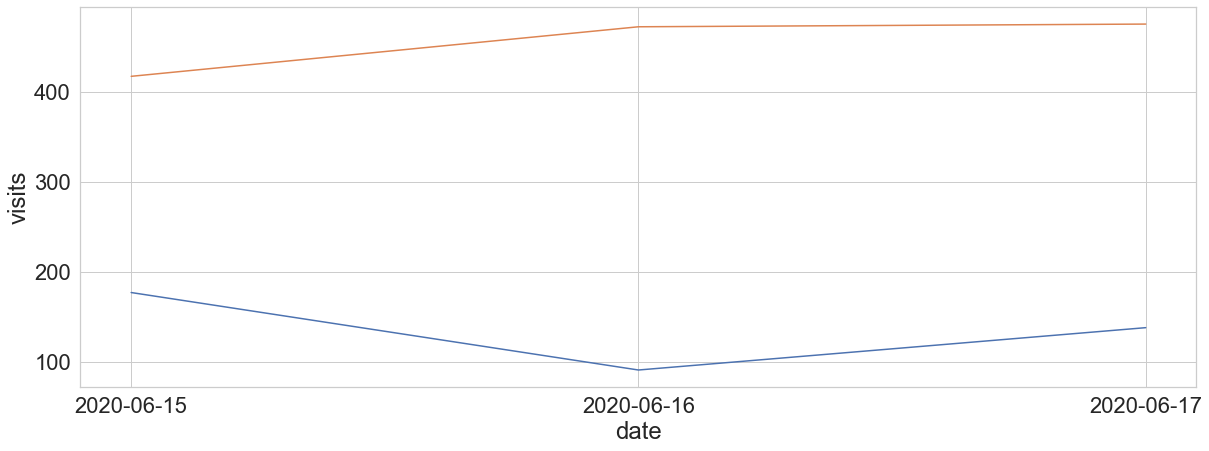

In [12]:
sns.lineplot(y=df[df.user_type == 'Robots'].visits, x= df[df.user_type == 'Robots'].date)
sns.lineplot(y=df[df.user_type == 'People'].visits, x= df[df.user_type == 'People'].date)

# 7.3

Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome. Данные лежат здесь.

In [40]:
df = pd.read_csv('/Users/dmitrijvelizancev/Documents/obuchenie/lesson_7/files/step_2_lesson_7.csv')
df.head()

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0


In [50]:
oll_visits = df.visits.sum()
oll_visits

594.0

In [51]:
Google_Chrome_visits = df[df.browser == 'Google Chrome'].loc[0, 'visits']
Google_Chrome_visits

354.0

In [53]:
round((Google_Chrome_visits * 100) / oll_visits)

60

# 7.4

Давайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на данные и определите, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере?

In [55]:
df = pd.read_csv('/Users/dmitrijvelizancev/Documents/obuchenie/lesson_7/files/step_3_lesson_7.csv')
df.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [70]:
robots_visits = df[df.user_type == 'Robots'] \
                                        .groupby('browser', as_index=False) \
                                        .agg({'visits':'sum'}) \
                                        .sort_values('visits', ascending=False) \
                                        .rename(columns={'visits': 'robots_visits'})

In [71]:
all_visits = df.groupby('browser', as_index=False) \
                                        .agg({'visits':'sum'}) \
                                        .sort_values('visits', ascending=False) \
                                        .rename(columns={'visits': 'all_visits'})

In [76]:
merge_visits = all_visits.merge(robots_visits, on='browser', how='outer').dropna()
merge_visits.head()

,browser,all_visits,robots_visits
0,Google Chrome,354.0,104.0
1,Firefox,58.0,31.0
2,Yandex Browser,54.0,7.0
3,Safari,41.0,22.0
5,Mobile Safari,16.0,1.0


In [79]:
merge_visits['percent_robots'] = (merge_visits.robots_visits * 100) / merge_visits.all_visits
merge_visits.sort_values('percent_robots', ascending=False)

merge_visits.nlargest(1, columns='percent_robots')

,browser,all_visits,robots_visits,percent_robots
9,UCWEB,4.0,4.0,100.0


# 7.5

Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

Hint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.

In [4]:
df = pd.read_csv('/Users/dmitrijvelizancev/Documents/obuchenie/lesson_7/files/step_4_lesson_7.csv')
df.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [87]:
df_non_date = df \
                .groupby(['browser', 'user_type'], as_index=False) \
                .agg({'visits': 'sum'})

In [89]:
visits_sum = df_non_date.visits.sum()

In [113]:
df_non_date['percent_visits'] = round((df_non_date.visits * 100) / visits_sum, 1)
df_non_date[df_non_date.browser == 'Safari'].query('user_type == "People"')

,browser,user_type,visits,percent_visits
15,Safari,People,19.0,3.2


In [119]:
df_non_date.query('(user_type == "People") & (browser == "Safari")')

,browser,user_type,visits,percent_visits
15,Safari,People,19.0,3.2


# 7.7

Другой аналитик уже агрегировал часть данных из метрики. Вам нужно объединить усилия, чтобы получить финальный отчет. Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика и посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.

В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)

In [3]:
import pandas as pd
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df1 = pd.read_csv(BytesIO(data))

In [8]:
all_visits = df.merge(df1, on=['date', 'browser', 'user_type'])

In [11]:
all_visits = all_visits.groupby(['browser', 'user_type'], as_index=False) \
                .agg({'visits': 'sum', 'users': 'sum'})

In [15]:
all_visits['ratio'] = all_visits.visits / all_visits.users

In [17]:
all_visits.query('browser == "Google Chrome" and user_type == "Robots"')

,browser,user_type,visits,users,ratio
10,Google Chrome,Robots,104.0,104.0,1.0
